# PCA + heatmap
### using CPM cuz no TPM 😅

In [79]:
# Load some libraries 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.decomposition import PCA

sns.set_context("paper", font_scale=2)

In [80]:
# Read in metadata file
metadata = pd.read_csv("data_adj/metadata.tsv", sep="\t")

# Read in data
merged_df = pd.read_csv("data_adj/fixed_cpm_matrix.tsv", sep="\t", index_col = 0)

In [81]:
#here is where we filter out what samples we want to use
merged_df = merged_df.filter(items=['LB_10.5_NA_1', 'LB_10.5_NA_2','LB_11.5_NA_1', 'LB_11.5_NA_2',
                #'G_4_F_1', 'G_4_F_2','G_4_M_1', 'G_4_M_2',
                'SM_0_NA_1', 'SM_0_NA_old_1','SM_0_NA_old_2', 'SM_0_NA_2',
                'MB_3', 'MB_4','MB_5',
                'MT_3','MT_4', 'MT_5'])

#set myotube sample types to "cell line"
metadata.loc[metadata['Biosample.type'] == 'in vitro differentiated cells', 'Biosample.type'] = "cell line"

In [82]:
merged_df.head()

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,SM_0_NA_1,SM_0_NA_old_1,SM_0_NA_old_2,SM_0_NA_2,MB_3,MB_4,MB_5,MT_3,MT_4,MT_5
gene_id,,,,,,,,,,,,,,
ENSMUSG00000099183.1,0.000000,0.000000,0.000000,0.000000,0.282104,1.879263,0.984804,0.820783,0.000000,0.000000,0.284426,1.859317,0.551599,1.196178
ENSMUSG00000065559.1,27.984259,102.230643,554.446583,578.657394,84156.184146,114423.625343,128558.071817,91859.800377,6699.470864,5734.668421,7773.064847,333027.578943,358592.892867,375866.219496
ENSMUSG00000065480.1,1.166011,7.302189,32.677185,25.159017,721.058229,898.019243,876.672419,911.069370,82.438318,84.412890,309.454958,8204.237322,7179.889140,6352.899310
ENSMUSG00000065405.3,5253.753097,5844.087754,4780.103857,4748.385579,4992.115189,6162.371812,3175.795569,4142.492891,31078.011825,31775.457011,34242.556371,8592.834625,7964.538800,7576.289965
ENSMUSG00000065567.1,36.437837,16.648991,39.425734,21.521569,14.387312,18.121465,19.400637,17.852035,511.907401,402.078109,573.970685,160.211169,145.897951,124.402472


# PCA (principal component analysis) 
[5-minute explanation of PCA on Youtube](https://www.youtube.com/watch?v=HMOI_lkzW08&t=28s)

In [83]:
input_df = merged_df.transpose() # transpose the matrix
data = input_df.values # just get the numbers
pca = PCA(merged_df.shape[1]) # compute the same # of PCs as samples
pca.fit(data)

PCA(n_components=14)

    prop_variance  pct_variance  PC
0    5.995693e-01  5.995693e+01   1
1    2.539645e-01  2.539645e+01   2
2    1.264815e-01  1.264815e+01   3
3    1.264596e-02  1.264596e+00   4
4    2.306866e-03  2.306866e-01   5
5    1.777607e-03  1.777607e-01   6
6    1.438726e-03  1.438726e-01   7
7    8.027521e-04  8.027521e-02   8
8    5.652012e-04  5.652012e-02   9
9    2.439338e-04  2.439338e-02  10
10   1.290699e-04  1.290699e-02  11
11   4.504548e-05  4.504548e-03  12
12   2.946514e-05  2.946514e-03  13
13   1.447620e-31  1.447620e-29  14


/opt/apps/python/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


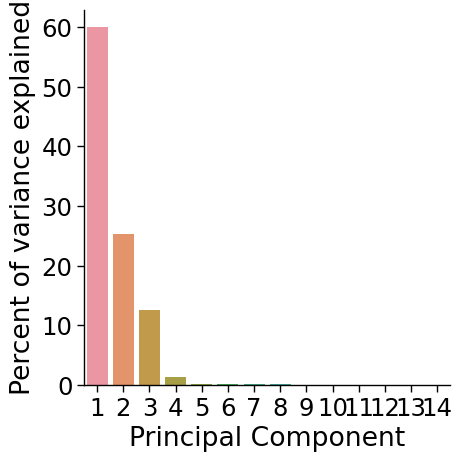

In [84]:
# Make df to plot the percent variance explained
pca_df = pd.DataFrame(data=pca.explained_variance_ratio_,
                      columns=['prop_variance'])

# compute percent variance from proportion variance
pca_df['pct_variance'] = pca_df.prop_variance*100
pca_df['PC'] = list(range(1, merged_df.shape[1]+1))
print(pca_df)

# Use Seaborn library to make categorical bar plot
ax = sns.catplot(data=pca_df, x='PC', y='pct_variance', kind='bar')

# Add nice x and y axis labels
ax.set(ylabel='Percent of variance explained', xlabel='Principal Component')

In [85]:
# first calculate the PCA representation of the data
pca_data = pca.transform(data) 
cols = ['PC{} ({:.1f}%)'.format(pc, var) for pc, var in zip(pca_df.PC, pca_df.pct_variance)]
print(cols)
pca_df = pd.DataFrame(data=pca_data, columns=cols)
pca_df.set_index(input_df.index, inplace=True)

# Perform a merge based on matching indices
pca_df = pca_df.merge(metadata, left_index=True, right_on='Sample')

['PC1 (60.0%)', 'PC2 (25.4%)', 'PC3 (12.6%)', 'PC4 (1.3%)', 'PC5 (0.2%)', 'PC6 (0.2%)', 'PC7 (0.1%)', 'PC8 (0.1%)', 'PC9 (0.1%)', 'PC10 (0.0%)', 'PC11 (0.0%)', 'PC12 (0.0%)', 'PC13 (0.0%)', 'PC14 (0.0%)']


## make it pretty!

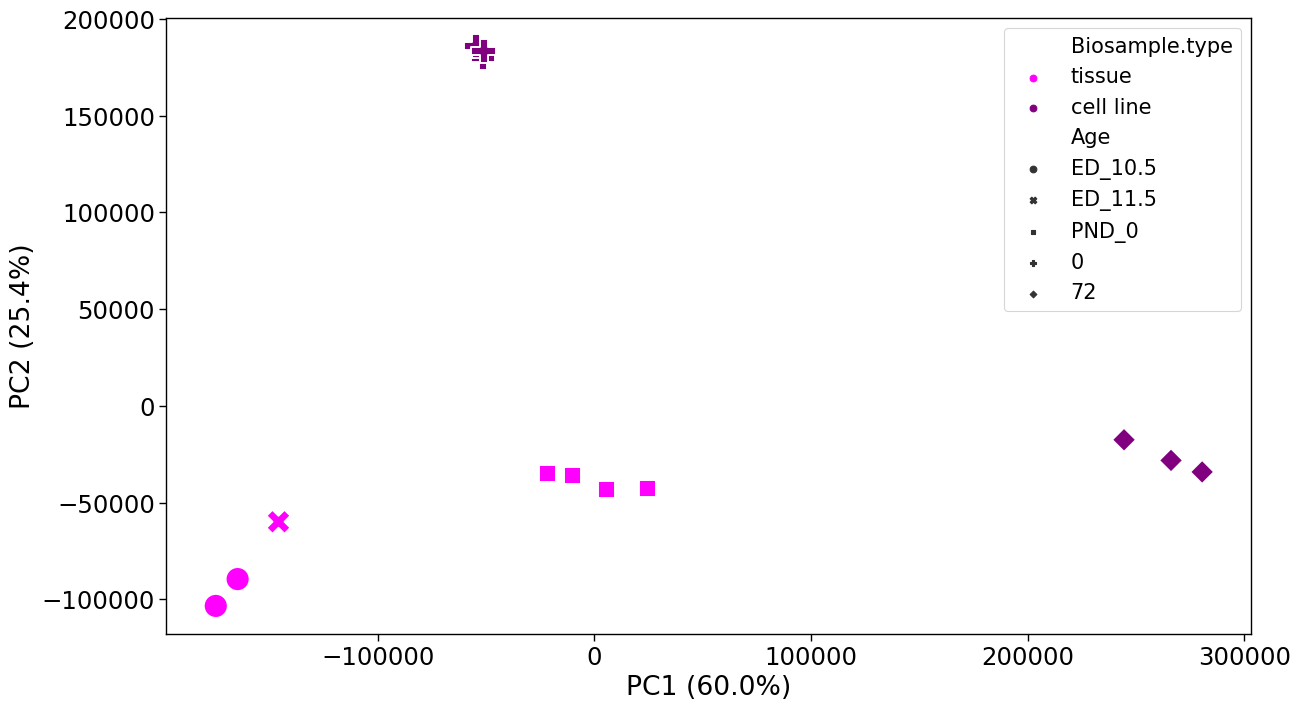

In [86]:
# Make a mini dictionary to assign color to fshd status
c_dict = {'in vitro differentiated cells': 'purple',
          'cell line': 'purple',
          'tissue': 'magenta'}

plt.figure(figsize=(14,8))
plt.tight_layout()
ax = sns.scatterplot(data=pca_df, x=cols[0], y=cols[1], 
                     s=300, # size of point
                     hue='Biosample.type', palette=c_dict, style='Age')
plt.legend(loc='upper right', fontsize=15)

#export
output_file = "plots/PCA.png"
plt.savefig(output_file)

In [87]:
# Get the top weighted genes for PC1 and PC2
top_genes_pc1 = input_df.columns[pca.components_[0].argsort()[::-1]]
top_genes_pc2 = input_df.columns[pca.components_[1].argsort()[::-1]]

# # Print the top weighted genes for PC1
# print("Top genes for PC1:")
# print(top_genes_pc1.to_frame().head(n=15))

# # Print the top weighted genes for PC2
# print("Top genes for PC2:")
# print(top_genes_pc2.to_frame().head(n=15))



# Heatmap

In [88]:
annot = pd.read_csv("data_adj/mirna_id_to_name.tsv", sep="\t")
annot.drop(columns=['Unnamed: 0'], inplace=True)

In [89]:
df = merged_df.copy(deep=True)

In [90]:
df = df.merge(annot, left_index=True, right_on='gene_id')
df = df.set_index(df["gene_name"])
df = df.drop(columns=['gene_id', 'gene_name'])

In [91]:
merged_df = df.copy(deep=True)

In [92]:
new_genes = []
for gene in top_genes_pc2[0:20].tolist():
    conversion = annot[["gene_name", "gene_id"]][annot["gene_id"] == gene]
    new_genes.append(conversion["gene_name"].iloc[0])

In [93]:
pc2_df = merged_df[merged_df.index.isin(new_genes)]

In [94]:
pc2_df

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,SM_0_NA_1,SM_0_NA_old_1,SM_0_NA_old_2,SM_0_NA_2,MB_3,MB_4,MB_5,MT_3,MT_4,MT_5
gene_name,,,,,,,,,,,,,,
Mir30a,5253.753097,5844.087754,4780.103857,4748.385579,4992.115189,6162.371812,3175.795569,4142.492891,31078.011825,31775.457011,34242.556371,8592.834625,7964.538800,7576.289965
Mir31,61.507069,43.521045,96.255621,101.242310,50.496644,55.975191,46.876665,43.296315,79786.716768,75927.630643,71862.381284,37311.538830,32083.207615,31019.576942
Mir25,896.079289,812.879659,932.010144,1002.116995,339.089199,342.428564,290.320185,303.484594,14705.860575,13118.327355,13990.890989,4238.313649,4143.612124,4120.532837
Mir182,3500.364378,3476.133964,2338.194657,3039.088019,234.992764,150.072573,34.074214,54.992475,10346.749388,11749.380717,12322.166503,2070.969519,1901.086154,1721.299587
Mir29a,12.243113,11.683502,24.863075,30.615189,203.114994,192.892923,154.318769,176.878783,24561.682374,24220.150697,21724.420689,11998.793923,12375.400668,12519.793001
Mir23a,5529.514648,4450.538040,9654.687400,9397.044452,21049.201786,18811.959469,20047.357249,19761.381903,110939.762272,120112.017550,121499.468551,26553.839165,27497.488845,26675.358891
Mir140,2064.713599,4979.508598,15323.113425,13545.857310,6927.067612,1341.928008,1143.061870,1017.565992,40082.793741,38558.585249,47104.846924,21909.264699,19558.323602,19759.059924
Mirlet7i,1914.298207,3850.298119,9567.666636,7537.399030,36181.833056,47794.087543,47294.812664,32027.371479,30919.058900,27114.642815,30124.643793,15891.584451,15902.325045,15112.807025
Mir21a,3907.885148,3511.476558,4763.054891,4514.679529,8976.272219,9576.724200,5266.140296,5986.177190,71457.237961,96706.368941,68145.508679,4494.899428,4327.294611,4490.450765


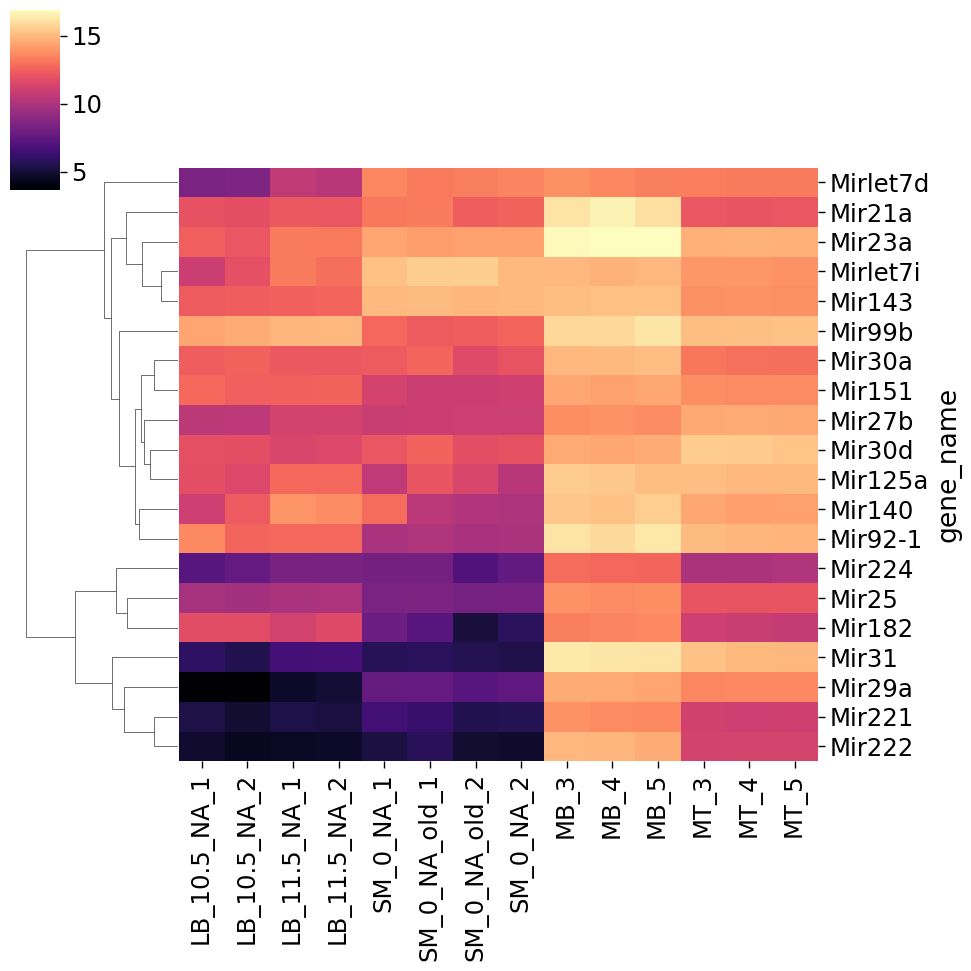

In [95]:
#ermmmm i dont think we're gonna use this heatmap :D
pc2_df = np.log2(pc2_df + 1)
ax = sns.clustermap(data=pc2_df, cmap="magma",col_cluster=False)

output_file = "plots/heatmap_pc2.png"
plt.savefig(output_file, dpi=300)

In [37]:
merged_df = df.copy(deep=True)

In [38]:
# order matrix based on expression so we can get some highly-expressed guys
# (but usually for these you'll want to curate the set of genes in a more intelligent way)


merged_df['total'] = merged_df.sum(axis=1)
merged_df.sort_values(by='total', ascending=False, inplace=True)
merged_df.drop('total', axis=1, inplace=True)

# log2 transform and add pseudocount -- common way to transform RNA-seq data for visualization
merged_df = np.log2(merged_df + 1) 

# show top 15 genes
merged_df_top15 = merged_df[:20] 

In [39]:
merged_df_top15

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,SM_0_NA_1,SM_0_NA_old_1,SM_0_NA_old_2,SM_0_NA_2,MB_3,MB_4,MB_5,MT_3,MT_4,MT_5
gene_name,,,,,,,,,,,,,,
Mir206,4.857198,6.689727,9.117504,9.179057,16.360799,16.804038,16.972072,16.487162,12.710047,12.485746,12.924453,18.345286,18.451991,18.519864
Mir335,17.403232,17.573020,16.853081,16.826802,15.874371,15.920843,15.375594,15.557742,7.412099,7.830791,7.266983,8.450930,8.157979,8.223269
Mir23a,12.433198,12.120088,13.237163,13.198145,14.361546,14.199439,14.291196,14.270469,16.759430,16.874033,16.890602,14.696687,14.747065,14.703274
Mir99b,14.399632,14.572984,14.872200,14.881320,12.667063,12.336449,12.385525,12.595751,15.825055,15.837739,16.180192,15.033341,15.118050,15.199369
Mir322,15.169702,15.770813,16.201115,16.231031,14.976381,14.796840,14.629863,14.844476,10.992775,11.198290,11.014362,11.112171,11.371656,11.211781
Mir17,16.470914,16.577285,16.185489,16.215403,12.175404,12.283088,11.526256,11.624111,11.131929,11.242364,11.076105,10.351889,10.160457,10.190404
Mir92-1,13.635422,12.637864,12.742276,12.685517,9.911355,10.080351,9.850299,9.909175,16.146804,15.858807,16.228725,15.021790,14.825257,14.791554
Mir31,5.965947,5.476416,6.603710,6.675849,5.686407,5.832262,5.581251,5.469115,16.283879,16.212356,16.132969,15.187373,14.969576,14.920938
Mir196b,15.781260,16.237645,16.208036,16.131519,13.289284,13.664823,13.370000,12.966477,9.000470,9.010408,9.155161,7.614109,7.634798,7.662176


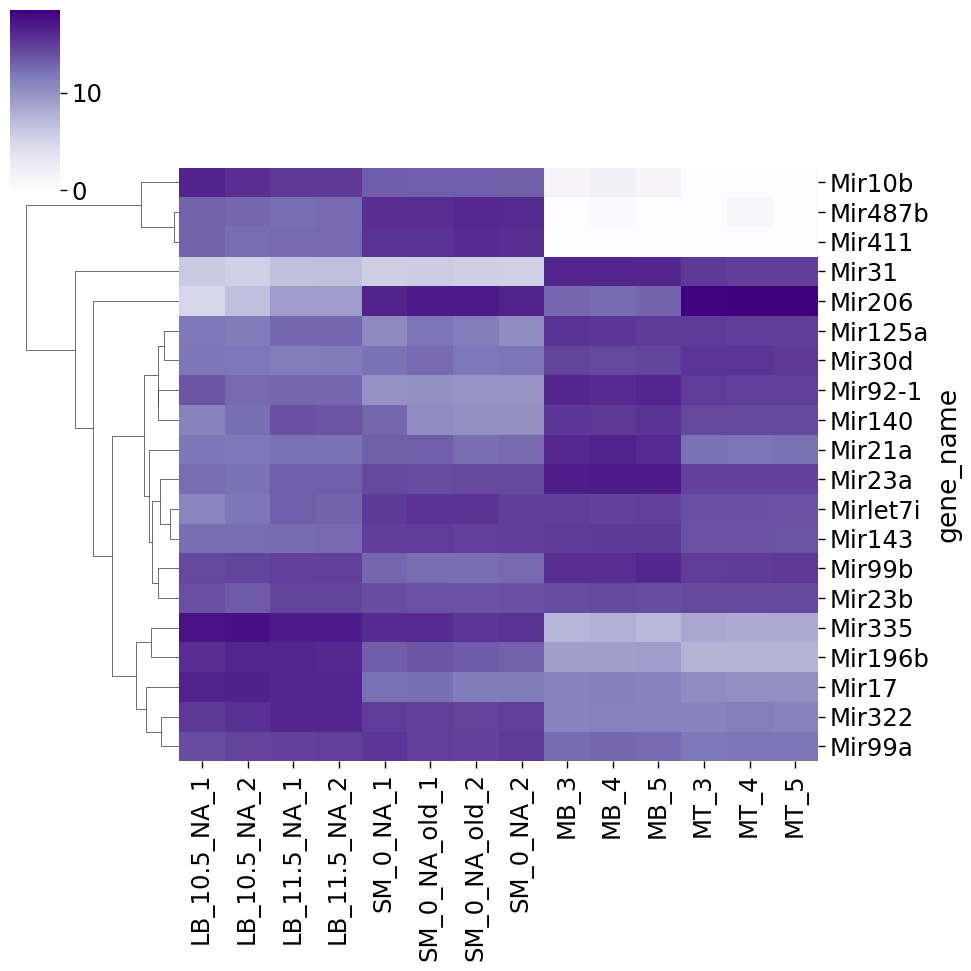

In [40]:
# Use clustermap function in seaborn to make heatmap
ax = sns.clustermap(data=merged_df_top15, cmap="Purples",col_cluster=False)

output_file = "plots/heatmap.png"
plt.savefig(output_file, dpi=300)

## Check expression of any gene you're interested in 

In [41]:
import os
import glob

In [42]:
path = os.getcwd() + "/wgcna_modules"
tsv_files = glob.glob(os.path.join(path, "*.csv"))
tsv_files

['/data/class/cosmos2023/PUBLIC/shai_hulud/scripts/cosmos-project/wgcna_modules/silver.csv',
 '/data/class/cosmos2023/PUBLIC/shai_hulud/scripts/cosmos-project/wgcna_modules/black.csv',
 '/data/class/cosmos2023/PUBLIC/shai_hulud/scripts/cosmos-project/wgcna_modules/darkgrey.csv']

In [43]:
#mygenes = ['Mir127', 'Mir133b', 'Mir206', 'Mir1a-1', 'Mir351']

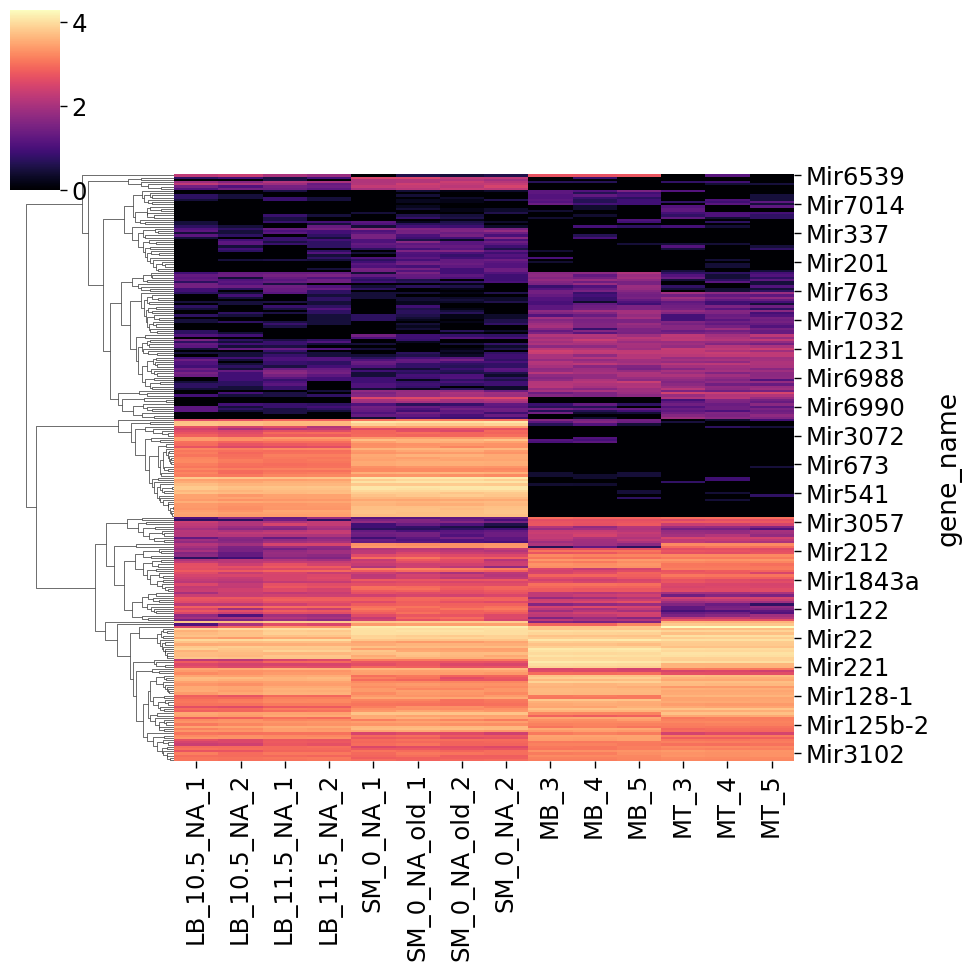

In [54]:
# subset df for the genes that were in the figure
#for i in range(len(tsv_files)):
i=1
genelist = pd.read_csv(tsv_files[i])
mygenes = genelist["gene_name"][genelist["gene_name"].notna()].values.tolist()
merged_df_my_genes = merged_df[merged_df.index.isin(mygenes)]
#sns.set(font_scale=0.5)
merged_df_my_genes = np.log2(merged_df_my_genes + 1) 
ax = sns.clustermap(data=merged_df_my_genes, col_cluster=False, cmap="magma")
plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)  # y axis labels were getting rotated for some reason
#plt.title(tsv_files[i][78:len(tsv_files[i])-4]+" module heatmap")
output_file = "plots/heatmap_"+tsv_files[i][78:len(tsv_files[i])-4]+".png"
plt.savefig(output_file, dpi=300)
plt.show()

In [53]:
# new_df = merged_df_my_genes[(merged_df_my_genes.index == "Mir205") | (merged_df_my_genes.index == "Mir301")]
# ax = sns.clustermap(data=new_df, col_cluster=False, cmap="plasma")
# plt.show()

123